# Project on Machine Learning

## Objective :- To predict the COVID Patient is in High risk or Not

# Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings #for avoid warnings
warnings.filterwarnings("ignore")

# Import Dataset 

In [2]:
Covid = pd.read_csv(r"C:\Users\drsab\Downloads\Project on ML\Project\Covid Data1.csv")
Covid

,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,1,1,03-05-2020,1,65,2,2,2,2,1,2,2,2,2,3
1,2,1,03-06-2020,1,72,97,2,2,2,1,2,2,1,2,5
2,2,2,09-06-2020,2,55,97,1,2,2,2,2,2,2,2,3
3,1,1,12-06-2020,2,53,2,2,2,2,2,2,2,2,2,7
4,2,1,21-06-2020,2,68,97,1,2,2,1,2,2,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,1,9999-99-99,2,40,97,2,2,2,2,2,2,2,2,7
1048571,2,2,9999-99-99,2,51,97,2,2,2,1,2,2,2,2,7
1048572,2,1,9999-99-99,2,55,97,2,2,2,2,2,2,2,2,7
1048573,2,1,9999-99-99,2,28,97,2,2,2,2,2,2,2,2,7


In [3]:
Covid["Death"] = [1 if row=='9999-99-99' else 0 for row in Covid["DATE_DIED"]]
Covid

,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,Death
0,1,1,03-05-2020,1,65,2,2,2,2,1,2,2,2,2,3,0
1,2,1,03-06-2020,1,72,97,2,2,2,1,2,2,1,2,5,0
2,2,2,09-06-2020,2,55,97,1,2,2,2,2,2,2,2,3,0
3,1,1,12-06-2020,2,53,2,2,2,2,2,2,2,2,2,7,0
4,2,1,21-06-2020,2,68,97,1,2,2,1,2,2,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,1,9999-99-99,2,40,97,2,2,2,2,2,2,2,2,7,1
1048571,2,2,9999-99-99,2,51,97,2,2,2,1,2,2,2,2,7,1
1048572,2,1,9999-99-99,2,55,97,2,2,2,2,2,2,2,2,7,1
1048573,2,1,9999-99-99,2,28,97,2,2,2,2,2,2,2,2,7,1


In [4]:
Covid=Covid.drop(['DATE_DIED'],axis=1)
Covid

,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,Death
0,1,1,1,65,2,2,2,2,1,2,2,2,2,3,0
1,2,1,1,72,97,2,2,2,1,2,2,1,2,5,0
2,2,2,2,55,97,1,2,2,2,2,2,2,2,3,0
3,1,1,2,53,2,2,2,2,2,2,2,2,2,7,0
4,2,1,2,68,97,1,2,2,1,2,2,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,1,2,40,97,2,2,2,2,2,2,2,2,7,1
1048571,2,2,2,51,97,2,2,2,1,2,2,2,2,7,1
1048572,2,1,2,55,97,2,2,2,2,2,2,2,2,7,1
1048573,2,1,2,28,97,2,2,2,2,2,2,2,2,7,1


# Data Pre-Processing 

### Check the Information 

In [5]:
#Check the information About Dataset
Covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 15 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   SEX                   1048575 non-null  int64
 1   PATIENT_TYPE          1048575 non-null  int64
 2   PNEUMONIA             1048575 non-null  int64
 3   AGE                   1048575 non-null  int64
 4   PREGNANT              1048575 non-null  int64
 5   DIABETES              1048575 non-null  int64
 6   COPD                  1048575 non-null  int64
 7   ASTHMA                1048575 non-null  int64
 8   HIPERTENSION          1048575 non-null  int64
 9   OTHER_DISEASE         1048575 non-null  int64
 10  CARDIOVASCULAR        1048575 non-null  int64
 11  RENAL_CHRONIC         1048575 non-null  int64
 12  TOBACCO               1048575 non-null  int64
 13  CLASIFFICATION_FINAL  1048575 non-null  int64
 14  Death                 1048575 non-null  int64
dtypes: int64(15)
me

### Describe the Dataset 

In [6]:
#Describe the Dataset
Covid.describe()

,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,Death
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.499259e+00,1.190765e+00,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.257180e+00,2.214333e+00,5.305653e+00,9.266223e-01
std,4.999997e-01,3.929041e-01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.135354e+00,5.323097e+00,1.881165e+00,2.607556e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00
50%,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,1.000000e+00
75%,2.000000e+00,1.000000e+00,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,1.000000e+00
max,2.000000e+00,2.000000e+00,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,1.000000e+00


# EDA (Exploratory Data Analysis 

### Check missing Value 

In [7]:
#Check the missing value
Covid.isnull().sum()

SEX                     0
PATIENT_TYPE            0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
Death                   0
dtype: int64

There is no any missing value present

# -------------------------------------------------------------------------- 

# 1) Logistic Regression 

#### We can perform first of all Logistic Regression and Check the accuracy 


In [8]:
Covid.Death.value_counts()

1    971633
0     76942
Name: Death, dtype: int64

## Data Partition 

In [9]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = Covid.drop('Death', axis = 1)
Y = Covid[['Death']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=56)








## Model Building 

### Hypothesis

* H0 :- There is no log linear relationship between CLASIFFICATION_FINAL and all independent Variable

Vs 

* H1 :- There is log linear relationship between CLASIFFICATION_FINAL and all independent Variable

Alpha = 0.05 (5%)

## Method 2 - Logistic Regression 

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
output=logreg.fit(X_train, y_train) # model

In [11]:
output.intercept_  # beto 

array([2.99700821])

In [12]:
output.coef_  # Beta 1 -- 

array([[ 2.86051815e+00, -2.95524719e+00,  6.93700091e-03,
        -2.18436259e-02, -3.03412834e-02, -1.74272230e-02,
         1.12915165e-02,  9.51386560e-03,  2.04809848e-01,
        -6.18888871e-05, -1.57854320e-01, -1.98710798e-02,
        -3.21713086e-02,  4.65474435e-01]])

In [13]:
output.n_features_in_

14

* We Reject Ho
* There is log linear relationship between Loan_Status and Married,Previous_Loan_Taken,Customer_Bandwith,Cibil_Score

## Prediction on Train Dataset 

In [14]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,Death
809777,2,1,2,18,97,2,2,2,2,2,2,2,2,7,1
251768,1,1,2,29,2,2,2,2,2,2,2,2,2,7,1
855177,1,1,2,25,2,2,2,2,2,2,2,2,2,7,1
154650,1,2,1,59,2,2,2,2,1,2,2,2,2,3,1
163001,1,1,2,31,2,2,2,2,2,2,2,2,2,5,1


In [15]:
train['Predicted']=output.predict(X_train)
train.head()

,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,Death,Predicted
809777,2,1,2,18,97,2,2,2,2,2,2,2,2,7,1,1
251768,1,1,2,29,2,2,2,2,2,2,2,2,2,7,1,1
855177,1,1,2,25,2,2,2,2,2,2,2,2,2,7,1,1
154650,1,2,1,59,2,2,2,2,1,2,2,2,2,3,1,0
163001,1,1,2,31,2,2,2,2,2,2,2,2,2,5,1,1


## Model Performance Matrix on Train data 

In [16]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['Death'])
matrix

array([[ 27332,  20955],
       [ 34229, 756344]], dtype=int64)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(train['Death'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.57      0.44      0.50     61561
           1       0.96      0.97      0.96    777299

    accuracy                           0.93    838860
   macro avg       0.76      0.71      0.73    838860
weighted avg       0.93      0.93      0.93    838860



* Accuracy of  Model is 94%,Hence Model is Over Fit 
* Sensitivity Capture by Model is 38% 
* Specificity Capture by Model is 98% 

## Prediction on Test Dataset 

In [18]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,Death
725762,1,2,2,27,1,2,2,2,2,1,2,2,2,7,1
871304,1,1,2,21,2,2,2,2,2,2,2,2,1,7,1
285521,1,2,2,23,2,2,2,2,2,2,2,2,2,7,1
770653,2,1,2,49,97,2,2,2,2,2,2,2,2,7,1
36011,1,2,1,66,2,1,2,2,1,2,2,2,2,3,0


In [19]:
test['Predicted']=output.predict(X_test)
test.head()

,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,Death,Predicted
725762,1,2,2,27,1,2,2,2,2,1,2,2,2,7,1,1
871304,1,1,2,21,2,2,2,2,2,2,2,2,1,7,1,1
285521,1,2,2,23,2,2,2,2,2,2,2,2,2,7,1,1
770653,2,1,2,49,97,2,2,2,2,2,2,2,2,7,1,1
36011,1,2,1,66,2,1,2,2,1,2,2,2,2,3,0,0


## Model Performance matrix on test data 

In [20]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'],test['Death'])
print(matrix)

[[  6744   5227]
 [  8637 189107]]


In [21]:
from sklearn.metrics import classification_report
print(classification_report(test['Death'],test['Predicted']))

              precision    recall  f1-score   support

           0       0.56      0.44      0.49     15381
           1       0.96      0.97      0.96    194334

    accuracy                           0.93    209715
   macro avg       0.76      0.71      0.73    209715
weighted avg       0.93      0.93      0.93    209715



* Accuracy of  Model is 93 %,Hence Model is Over Fit 
* Sensitivity Capture by Model is 37% 
* Specificity Capture by Model is 98% 

#### Accuracy of Train Data
* Accuracy of  Model is 94%,Hence Model is Over Fit 
* Sensitivity Capture by Model is 38% 
* Specificity Capture by Model is 98% 

#### Accuracy of Test Data
* Accuracy of  Model is 93 %,Hence Model is Over Fit 
* Sensitivity Capture by Model is 37% 
* Specificity Capture by Model is 98% 

# ----------------------------------------------------------------------------------------------------------- 

# Decision Tree 

#### We perform next Decision Tree and Check the accuracy 


## ------------------- 

## Data Partiton 

In [22]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
x = Covid.drop(['Death'],axis=1)
y = Covid[['Death']]

# Train test split

X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=231)

## Model Building 

In [23]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier()  # by default it use Gini index for split
#Train the model using the training sets
dt.fit(X_train,y_train)  # Model = dt

DecisionTreeClassifier()

In [24]:
?tree.DecisionTreeRegressor

## Plotting the Tree 

In [25]:
Covid.head()

,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,Death
0,1,1,1,65,2,2,2,2,1,2,2,2,2,3,0
1,2,1,1,72,97,2,2,2,1,2,2,1,2,5,0
2,2,2,2,55,97,1,2,2,2,2,2,2,2,3,0
3,1,1,2,53,2,2,2,2,2,2,2,2,2,7,0
4,2,1,2,68,97,1,2,2,1,2,2,2,2,3,0


In [26]:
train=pd.concat([y_train,X_train],axis=1)
train.head()

,Death,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
177388,1,1,1,2,48,2,2,2,2,2,2,2,2,2,6
819665,1,2,1,2,40,97,2,2,2,2,2,2,2,2,7
315050,1,1,1,2,65,2,2,2,2,1,2,2,2,2,7
602025,1,2,1,2,8,97,2,2,2,2,2,2,2,2,3
201540,1,1,2,2,4,2,2,2,2,2,2,2,2,2,6


In [27]:
independent_variable = list(train.columns[1:])
independent_variable

['SEX',
 'PATIENT_TYPE',
 'PNEUMONIA',
 'AGE',
 'PREGNANT',
 'DIABETES',
 'COPD',
 'ASTHMA',
 'HIPERTENSION',
 'OTHER_DISEASE',
 'CARDIOVASCULAR',
 'RENAL_CHRONIC',
 'TOBACCO',
 'CLASIFFICATION_FINAL']

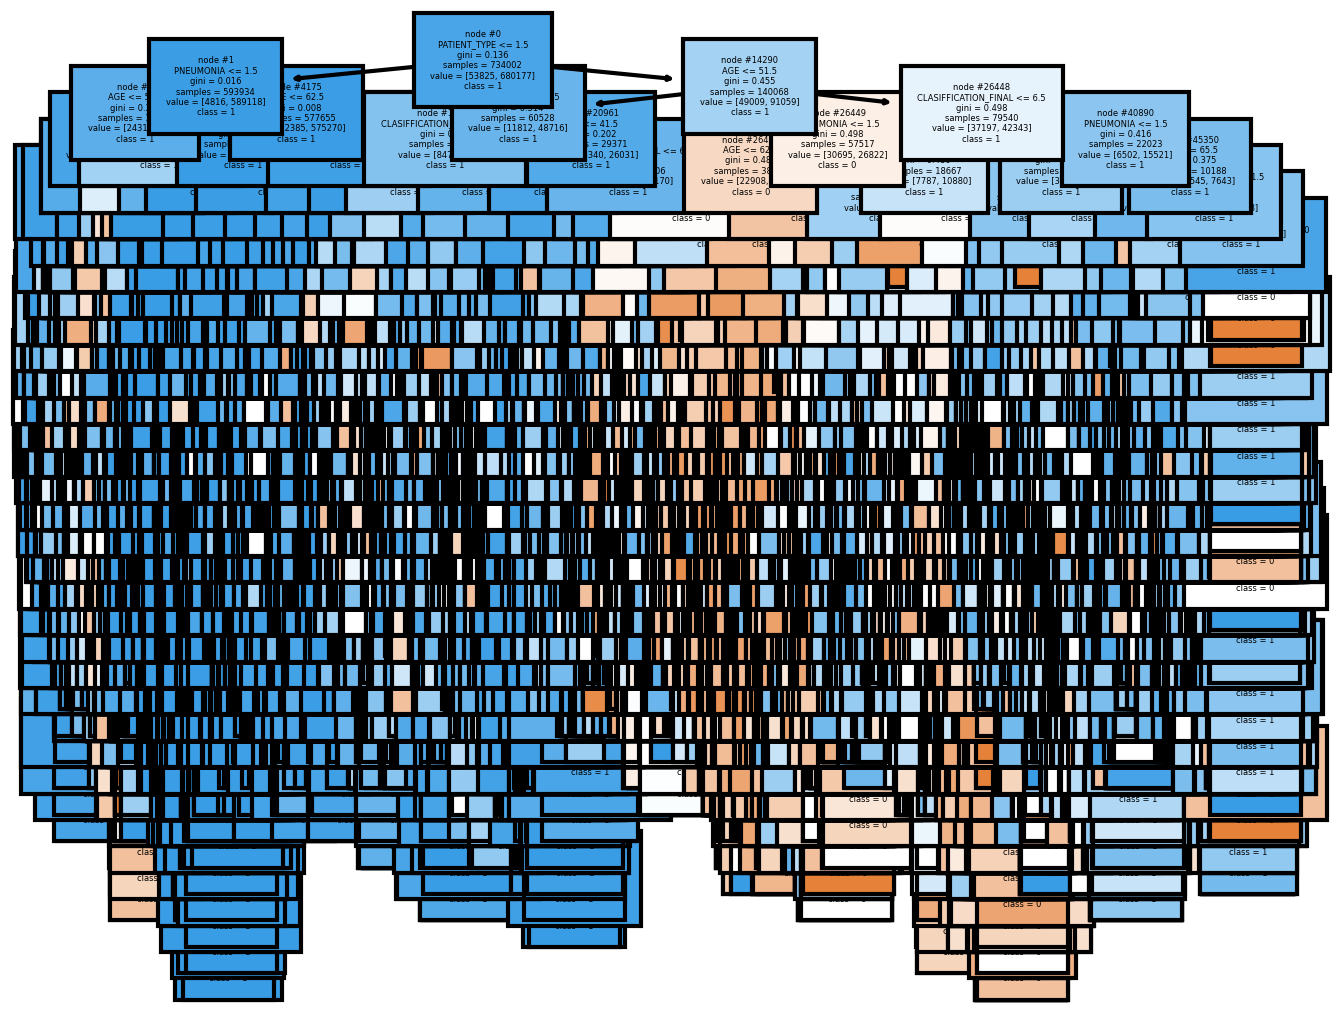

In [28]:
from sklearn import tree
import matplotlib.pyplot as plt

Death=['0', '1']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names=Death, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')

## Prediction on Train Dataset 

In [29]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,Death,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,Predicted
177388,1,1,1,2,48,2,2,2,2,2,2,2,2,2,6,1
819665,1,2,1,2,40,97,2,2,2,2,2,2,2,2,7,1
315050,1,1,1,2,65,2,2,2,2,1,2,2,2,2,7,1
602025,1,2,1,2,8,97,2,2,2,2,2,2,2,2,3,1
201540,1,1,2,2,4,2,2,2,2,2,2,2,2,2,6,1


## Model Performance Matrix on Train Dataset 

In [30]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Death'])
print(matrix)

[[ 31855  14138]
 [ 21970 666039]]


#### Final Accuracy of Model

In [31]:
from sklearn.metrics import classification_report
print(classification_report(train['Death'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.69      0.59      0.64     53825
           1       0.97      0.98      0.97    680177

    accuracy                           0.95    734002
   macro avg       0.83      0.79      0.81    734002
weighted avg       0.95      0.95      0.95    734002



#### Model Improve by Pruning Method 

In [32]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=300, ## child
                                 min_samples_split=500, #parent 
                                 max_depth=3)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=300, min_samples_split=500)

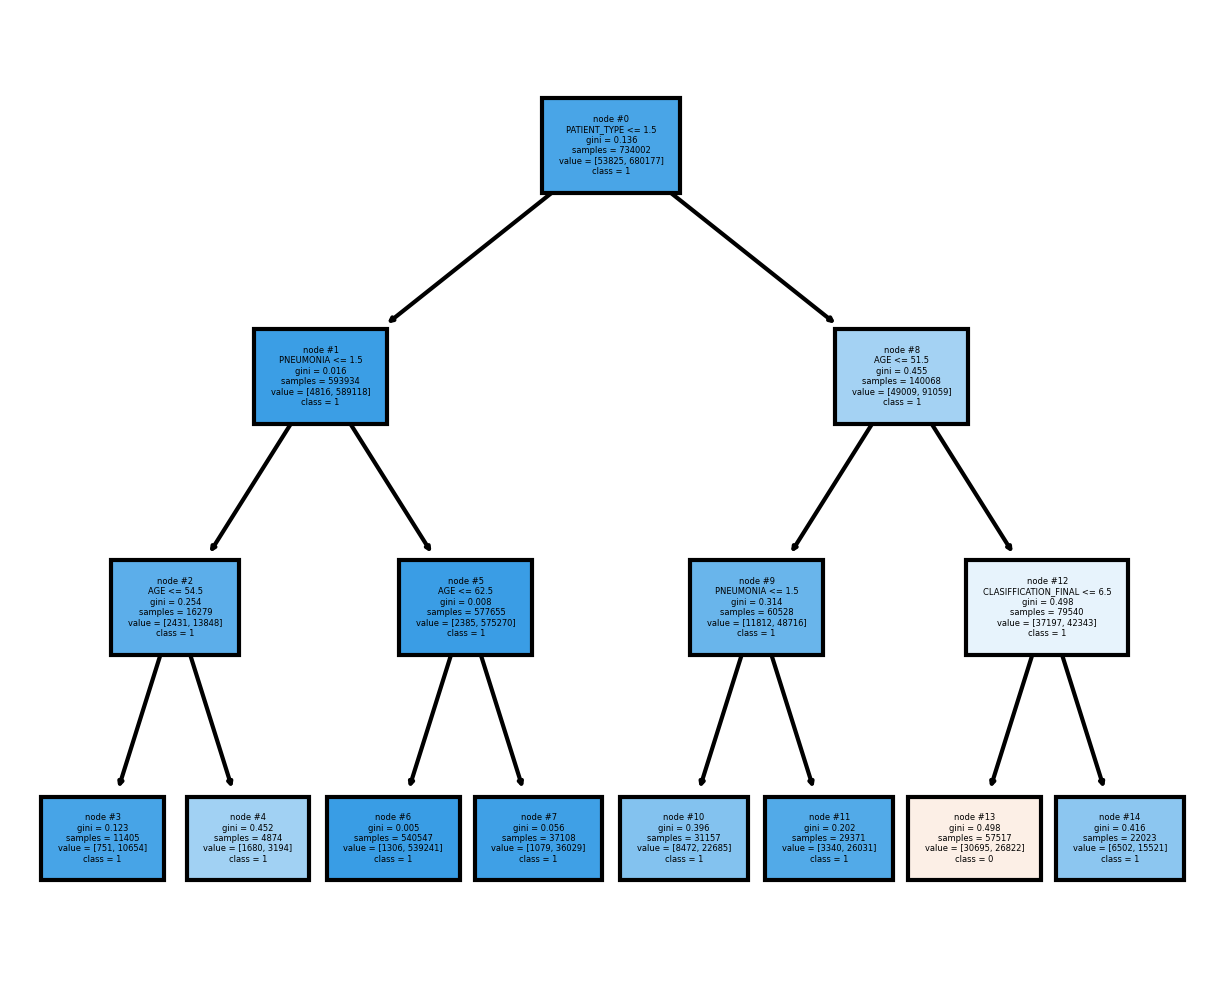

In [33]:
from sklearn import tree
import matplotlib.pyplot as plt

Death=['0', '1']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names=Death, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')

## Prediction on Train Dataset 

In [34]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,Death,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,Predicted
177388,1,1,1,2,48,2,2,2,2,2,2,2,2,2,6,1
819665,1,2,1,2,40,97,2,2,2,2,2,2,2,2,7,1
315050,1,1,1,2,65,2,2,2,2,1,2,2,2,2,7,1
602025,1,2,1,2,8,97,2,2,2,2,2,2,2,2,3,1
201540,1,1,2,2,4,2,2,2,2,2,2,2,2,2,6,1


## Performance Matrix on Train Dataset 

In [35]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Death'])
print(matrix)

[[ 30695  26822]
 [ 23130 653355]]


In [36]:
from sklearn.metrics import classification_report
print(classification_report(train['Death'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.53      0.57      0.55     53825
           1       0.97      0.96      0.96    680177

    accuracy                           0.93    734002
   macro avg       0.75      0.77      0.76    734002
weighted avg       0.93      0.93      0.93    734002



## Prediction on Test Dataset 

In [37]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,Death
82400,2,1,2,38,97,2,2,2,2,2,2,2,2,3,1
206572,2,1,2,53,97,2,2,2,1,2,2,2,2,6,1
802614,2,1,2,23,97,2,2,2,2,2,2,2,2,7,1
922762,1,1,2,22,2,2,2,2,2,2,2,2,2,7,1
878832,1,1,2,31,2,2,2,2,2,2,2,2,2,7,1


In [38]:
test['Predicted']=dt.predict(X_test)
test.head()

,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,Death,Predicted
82400,2,1,2,38,97,2,2,2,2,2,2,2,2,3,1,1
206572,2,1,2,53,97,2,2,2,1,2,2,2,2,6,1,1
802614,2,1,2,23,97,2,2,2,2,2,2,2,2,7,1,1
922762,1,1,2,22,2,2,2,2,2,2,2,2,2,7,1,1
878832,1,1,2,31,2,2,2,2,2,2,2,2,2,7,1,1


## Model Performance Metrix on test Data 

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['Death'])
print(confusion_matrix)

[[ 13286  11534]
 [  9831 279922]]


In [40]:
from sklearn.metrics import classification_report
print(classification_report(train['Death'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.53      0.57      0.55     53825
           1       0.97      0.96      0.96    680177

    accuracy                           0.93    734002
   macro avg       0.75      0.77      0.76    734002
weighted avg       0.93      0.93      0.93    734002



#### Accuracy of Train Data
* Accuracy of  Model is 93%,Hence Model is Over Fit 
* Sensitivity Capture by Model is 57% 
* Specificity Capture by Model is 96% 

#### Accuracy of Test Data
* Accuracy of  Model is 93 %,Hence Model is Over Fit 
* Sensitivity Capture by Model is 57% 
* Specificity Capture by Model is 96% 

# ----------------------------------------------------------------------------------------------------------- 

# Random Forest 

#### We perform next Decision Tree and Check the accuracy 


## ------------------ 

## Data Partition 

In [8]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = Covid.drop('Death', axis = 1)
Y = Covid[['Death']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1234)

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestClassifier(n_estimators=20, # make 20 tress
                               criterion="gini",
                               max_depth=4,  # each tree will have 4 branches
                               min_samples_split=100,# each tree will have parent node
                               min_samples_leaf=50,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=50,
                       min_samples_split=100, n_estimators=20)

## Importance Features

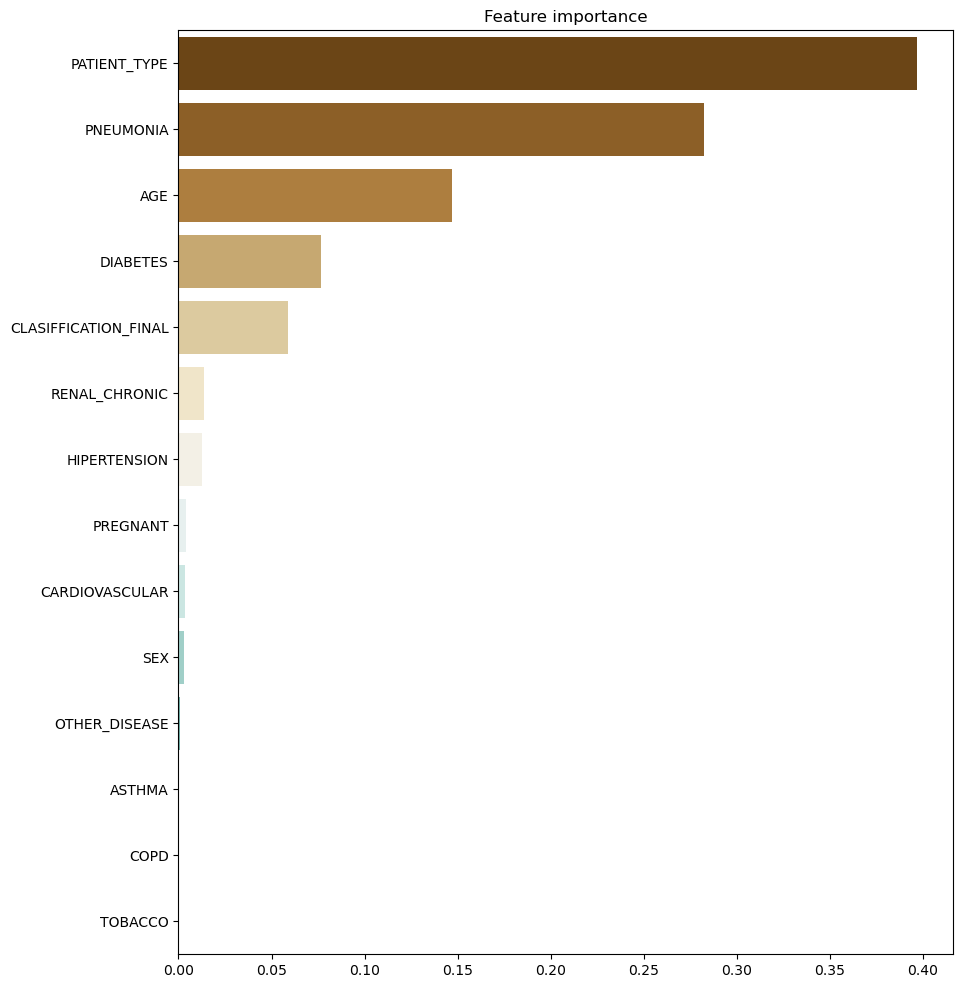

In [10]:
# Plot features importances
imp = pd.Series(data=Model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="BrBG", orient='h')


## Random Forest Visulization 

In [11]:
!pip install pydot

In [12]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot 

## Prediction on Train Dataset 

In [13]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,Death
218197,1,1,2,22,2,2,2,2,2,2,2,2,2,6,1
400360,2,2,2,40,97,2,2,2,1,2,2,2,2,3,1
739200,2,1,2,54,97,2,2,2,2,2,2,2,2,7,1
643324,1,1,2,48,2,2,2,2,2,2,2,2,2,3,1
676135,2,1,2,40,97,2,2,2,2,2,2,2,2,5,1


In [14]:
train['Predicted']=Model.predict(X_train)
train.head()

,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,Death,Predicted
218197,1,1,2,22,2,2,2,2,2,2,2,2,2,6,1,1
400360,2,2,2,40,97,2,2,2,1,2,2,2,2,3,1,1
739200,2,1,2,54,97,2,2,2,2,2,2,2,2,7,1,1
643324,1,1,2,48,2,2,2,2,2,2,2,2,2,3,1,1
676135,2,1,2,40,97,2,2,2,2,2,2,2,2,5,1,1


## Model Performance Matrix on Train Dataset 

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['Death'], train['Predicted'])
print(confusion_matrix)

[[  7858  45977]
 [  3661 676506]]


In [16]:
from sklearn.metrics import classification_report
print(classification_report(train['Death'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.68      0.15      0.24     53835
           1       0.94      0.99      0.96    680167

    accuracy                           0.93    734002
   macro avg       0.81      0.57      0.60    734002
weighted avg       0.92      0.93      0.91    734002



## Model Performance Metrix on Test Data 

In [17]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,Death
424938,1,1,2,78,2,2,2,2,1,2,1,2,2,7,1
673819,1,1,2,34,2,2,2,2,2,2,2,2,2,5,1
110509,1,1,2,47,2,2,2,1,2,1,2,2,2,3,1
442945,2,1,2,71,97,1,2,2,1,2,2,2,2,6,1
785107,1,1,2,24,2,2,2,2,2,2,2,2,2,7,1


In [18]:
test['Predicted']=Model.predict(X_test)
test.head()

,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,Death,Predicted
424938,1,1,2,78,2,2,2,2,1,2,1,2,2,7,1,1
673819,1,1,2,34,2,2,2,2,2,2,2,2,2,5,1,1
110509,1,1,2,47,2,2,2,1,2,1,2,2,2,3,1,1
442945,2,1,2,71,97,1,2,2,1,2,2,2,2,6,1,1
785107,1,1,2,24,2,2,2,2,2,2,2,2,2,7,1,1


## Model Performance Metrix on Test Data 

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['Death'])
print(confusion_matrix)

[[  3391   1512]
 [ 19716 289954]]


In [20]:
from sklearn.metrics import classification_report
print(classification_report(test['Death'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.69      0.15      0.24     23107
           1       0.94      0.99      0.96    291466

    accuracy                           0.93    314573
   macro avg       0.81      0.57      0.60    314573
weighted avg       0.92      0.93      0.91    314573



#### Accuracy of Train Data
* Accuracy of  Model is 9%,Hence Model is Over Fit 
* Sensitivity Capture by Model is 03% 
* Specificity Capture by Model is 100% 

#### Accuracy of Test Data
* Accuracy of  Model is 93 %,Hence Model is Over Fit 
* Sensitivity Capture by Model is 03% 
* Specificity Capture by Model is 100% 

In [21]:
import pickle

pickle.dump(Model, open('model1.pkl','wb'))
Finalmodel=pickle.load(open('model1.pkl','rb'))

# ----------------------------------------------------------------------------------------------------------- 

#  KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier

## Data Partition 

In [55]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
train_x = Covid.drop(['Death'],axis=1)
train_y = Covid['Death']

# Train test split

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3,random_state=20)

## Scalling Data 

In [56]:
from sklearn.preprocessing import StandardScaler ,minmax_scale
scaler = StandardScaler()   # converting data into Z-scale = X-mean / Standard Deviation
#scaler.fit(X_train)         # Mean = 0 & standard Deviation =1

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
X_train[0:5]  #All Row and 5 column value

array([[ 1.00140971, -0.48560712, -0.11301141,  0.24900229,  0.99424765,
        -0.03449116, -0.05089805, -0.04728813, -0.02475392, -0.06539098,
        -0.05018883, -0.04987503, -0.04016512,  0.89967313],
       [ 1.00140971,  2.05927789, -0.11301141,  0.60370566,  0.99424765,
        -0.03449116, -0.05089805, -0.04728813, -0.02475392, -0.06539098,
        -0.05018883, -0.04987503, -0.04016512, -1.22719039],
       [ 1.00140971,  2.05927789, -0.11301141,  0.42635398,  0.99424765,
        -0.03449116, -0.05089805, -0.04728813, -0.02475392, -0.06539098,
        -0.05018883, -0.04987503, -0.22831669,  0.89967313],
       [-0.99859228, -0.48560712, -0.11301141,  2.90927756, -1.00530351,
        -0.03449116, -0.05089805, -0.04728813, -0.21549906, -0.06539098,
        -0.05018883, -0.04987503, -0.04016512,  0.89967313],
       [-0.99859228, -0.48560712, -0.11301141,  0.72194012, -1.00530351,
        -0.03449116, -0.05089805, -0.04728813, -0.02475392, -0.06539098,
        -0.05018883, -0.04

In [58]:
X_train.mean(axis=0)

array([-9.90449345e-17,  8.32126528e-17, -2.05805142e-17,  1.42379211e-16,
       -5.75886542e-17,  6.21093974e-17,  3.23712321e-17,  5.05122874e-17,
       -4.66594912e-17, -3.30198184e-17,  7.25642212e-17, -9.71911394e-18,
        2.12387809e-17, -6.32129622e-17])

In [59]:
 X_train.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## Model Building 

In [60]:
# train the decision tree
## Instantiate the model with 5 neighbors. 
model = KNeighborsClassifier(n_neighbors=8)
## Fit the model on the training data.
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [61]:
Covid.head()

,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,Death
0,1,1,1,65,2,2,2,2,1,2,2,2,2,3,0
1,2,1,1,72,97,2,2,2,1,2,2,1,2,5,0
2,2,2,2,55,97,1,2,2,2,2,2,2,2,3,0
3,1,1,2,53,2,2,2,2,2,2,2,2,2,7,0
4,2,1,2,68,97,1,2,2,1,2,2,2,2,3,0


In [62]:
X_train=pd.DataFrame(X_train,columns=['SEX', 'PATIENT_TYPE', 'PNEUMONIA', 'AGE','DIABETES', 'COPD', 'ASTHMA','HIPERTENSION','OTHER_DISEASE','CARDIOVASCULAR','RENAL_CHRONIC','TOBACCO','CLASIFFICATION_FINAL','Death'])
X_train.head()

,SEX,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,Death
0,1.001410,-0.485607,-0.113011,0.249002,0.994248,-0.034491,-0.050898,-0.047288,-0.024754,-0.065391,-0.050189,-0.049875,-0.040165,0.899673
1,1.001410,2.059278,-0.113011,0.603706,0.994248,-0.034491,-0.050898,-0.047288,-0.024754,-0.065391,-0.050189,-0.049875,-0.040165,-1.227190
2,1.001410,2.059278,-0.113011,0.426354,0.994248,-0.034491,-0.050898,-0.047288,-0.024754,-0.065391,-0.050189,-0.049875,-0.228317,0.899673
3,-0.998592,-0.485607,-0.113011,2.909278,-1.005304,-0.034491,-0.050898,-0.047288,-0.215499,-0.065391,-0.050189,-0.049875,-0.040165,0.899673
4,-0.998592,-0.485607,-0.113011,0.721940,-1.005304,-0.034491,-0.050898,-0.047288,-0.024754,-0.065391,-0.050189,-0.049875,-0.040165,0.899673


In [63]:
y_train.reset_index(drop=True, inplace=True)

In [67]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,SEX,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,Death,Death
0,1.001410,-0.485607,-0.113011,0.249002,0.994248,-0.034491,-0.050898,-0.047288,-0.024754,-0.065391,-0.050189,-0.049875,-0.040165,0.899673,1
1,1.001410,2.059278,-0.113011,0.603706,0.994248,-0.034491,-0.050898,-0.047288,-0.024754,-0.065391,-0.050189,-0.049875,-0.040165,-1.227190,1
2,1.001410,2.059278,-0.113011,0.426354,0.994248,-0.034491,-0.050898,-0.047288,-0.024754,-0.065391,-0.050189,-0.049875,-0.228317,0.899673,0
3,-0.998592,-0.485607,-0.113011,2.909278,-1.005304,-0.034491,-0.050898,-0.047288,-0.215499,-0.065391,-0.050189,-0.049875,-0.040165,0.899673,1
4,-0.998592,-0.485607,-0.113011,0.721940,-1.005304,-0.034491,-0.050898,-0.047288,-0.024754,-0.065391,-0.050189,-0.049875,-0.040165,0.899673,1


In [ ]:
train['Predicted']=model.predict(X_train)
train.head()

## Model Performance Matrix on Train Data 

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['Death'],train['Predicted'])
print(confusion_matrix)

# ------------------------------------------------------------------------------------------------------------- 

# SVM 

## Data Partition 

In [8]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
x = Covid.drop(['Death'],axis=1)  # fgood 
y = Covid['Death']

# Train test split

X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=231)

### Modeling with Grid Search 

# Define Model parameters to tune
model_parameters = {
        'kernel':['linear'], # calculation
        'C':[1, 10], #cost complexity or penalty 
        'gamma': [0.0001]
    }

# Gridsearch the parameters to find the best parameters. 
model = SVC(probability=True)  # Support vector classifier 

gscv = GridSearchCV(estimator=model, 
                    param_grid=model_parameters, 
                    cv=5,  # times 
                    verbose=1, 
                    n_jobs=-1,
                    scoring='accuracy')

gscv.fit(X_train, y_train)

## Manual Model 

In [ ]:
from sklearn.svm import SVC
#from sklearn.svm import LinearSVC
model = SVC(kernel="linear")  # if we use linear then only we get support_vector
model.fit(X_train, y_train) #Variable = fgood ( defaulter =1 , non-defaulter = 0)

In [ ]:
model.support_vectors_        #####this are support vector

## Data Partition 

In [8]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
train_x = Covid.drop(['Death'],axis=1)
train_y = Covid['Death']

# Train test split

X_train, X_test, y_train, y_test =train_test_split(train_x,train_y,test_size=0.3,random_state=231)